In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Some information about the variables of the dataset

* **anemia** - anemia is a condition in which you lack enough healthy red blood cells to carry adequate oxygen to your body's tissues. Having anemia, also referred to as low hemoglobin, can make you feel tired and weak. (there is not anemia - 0, there is anemia - 1)
* **creatine_phosphokinase (CPK)** - CPK is an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle. Total CPK normal values: 10 to 120 micrograms per liter (mcg/L)
* **ejection_fraction (EF)** - EF is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat. This indication of how well your heart is pumping out blood can help to diagnose and track heart failure. A normal heart’s ejection fraction may be between 50 and 70 percent.
* **platelets** - platelets are colorless blood cells that help blood clot. Platelets stop bleeding by clumping and forming plugs in blood vessel injuries. Thrombocytopenia might occur as a result of a bone marrow disorder such as leukemia or an immune system problem. The normal number of platelets in the blood is 150,000 to 400,000 platelets per microliter (mcL) or 150 to 400 × 109/L.
* **serum_creatinine** - The amount of creatinine in your blood should be relatively stable. An increased level of creatinine may be a sign of poor kidney function. Serum creatinine is reported as milligrams of creatinine to a deciliter of blood (mg/dL) or micromoles of creatinine to a liter of blood (micromoles/L). Here are the normal values by age: 0.9 to 1.3 mg/dL for adult males. 0.6 to 1.1 mg/dL for adult females. 0.5 to 1.0 mg/dL for children ages 3 to 18 years.
* **serum_sodium** - Measurement of serum sodium is routine in assessing electrolyte, acid-base, and water balance, as well as renal function. Sodium accounts for approximately 95% of the osmotically active substances in the extracellular compartment, provided that the patient is not in renal failure or does not have severe hyperglycemia. The normal range for blood sodium levels is 135 to 145 milliequivalents per liter (mEq/L).
* **time** - follow-up period (days)
* **high_blood_pressure** - (True - 1, False - 0)
* **age** - between 40 - 95
* **diabetes** - (True - 1, False - 0)
* **sex** - (male - 1, female - 0)
* **smoking** - (True - 1, False - 0)
* **DEATH_EVENT** - (True - 1, False - 0)

In [ ]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tabulate import tabulate


import warnings
warnings.filterwarnings('ignore')

## Data Understanding & Exploration

In [ ]:
def explore_dataset(data, data_filename=None):
    """
    In explore_dataset function we are doing all the things that given below:
    - checking shape of dataset
    - checking column names that exist in dataset
    - checking null values 
    - checking overall information about dataset using info() method
    - checking dtypes of columns
    """
    print("="*100)
    print("\t\t\tEDA Dataset: {}".format(data_filename))
    print("="*100)
    
    print("Total Rows: {}".format(data.shape[0]))
    print("\nTotal Columns: {}".format(data.shape[1]))
    print("\nColumns: {}".format(data.columns.tolist()))
    print("\nTotal Null Values: {}".format(data.isnull().sum().sum()))
    print(" ")
    print("\t\tOverall Information about Dataset\n")
    print(data.info())
    print(" ")
    print("\t\tDtype of all Columns\n")
    print(data.dtypes)
    # lets try to check the distributin of labels in dataset
    df['DEATH_EVENT'].value_counts().plot(kind='pie', figsize=(15,8),autopct='%1.0f%%',textprops={'fontsize': 14})
    plt.title("All Lables Distribution in Dataset", fontsize=18)
    plt.show()

In [ ]:
dataset_file1 = '/content/drive/MyDrive/Colab Notebooks/dataset/heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(dataset_file1)
df1 = df.copy()

			EDA Dataset: /content/drive/MyDrive/Colab Notebooks/dataset/heart_failure_clinical_records_dataset.csv
Total Rows: 299

Total Columns: 13

Columns: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

Total Null Values: 0
 
		Overall Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    flo

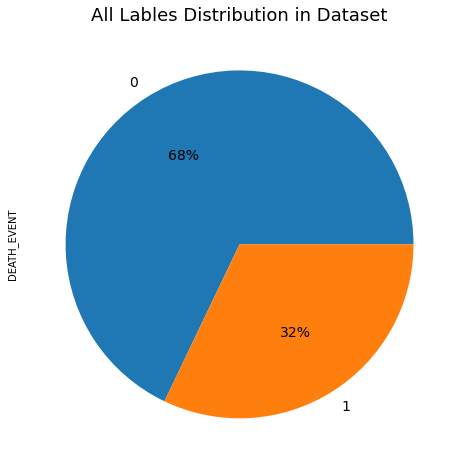

In [ ]:
# lets check the information of heart_failure_clinical_records_dataset.csv dataset
explore_dataset(df,dataset_file1)

In [ ]:
df['platelets'].min()/1000, df['platelets'].max()/1000

(25.1, 850.0)

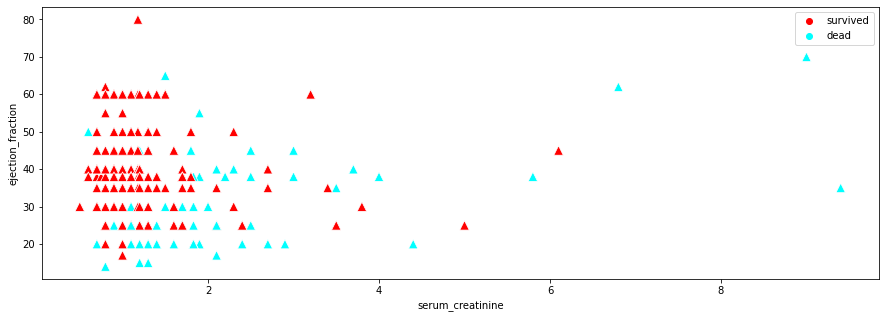

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.scatterplot(x='serum_creatinine', y='ejection_fraction', data=df, hue="DEATH_EVENT", palette=['red','cyan'], s=90, marker="^")
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['survived', 'dead'])
plt.show()

# Biostatistics Tests

### 1 Pearson correlation coefficients (PCC)

### 1-1 Pearson correlation coefficients (p-value)

In [ ]:
PCC = df.corr()['DEATH_EVENT'].values
dic = {
    'feature' : df.corr()['DEATH_EVENT'].index,
    'PCC' : PCC
}
pcc_df = pd.DataFrame(dic)[:-1].sort_values(by = 'PCC',ascending=False).reset_index()
pcc_df = pcc_df.drop('index', axis=1)
print(tabulate(pcc_df, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------+-------------+
|    | feature                  |         PCC |
|----+--------------------------+-------------|
|  0 | serum_creatinine         |  0.294278   |
|  1 | age                      |  0.253729   |
|  2 | high_blood_pressure      |  0.0793511  |
|  3 | anaemia                  |  0.0662701  |
|  4 | creatinine_phosphokinase |  0.0627282  |
|  5 | diabetes                 | -0.00194288 |
|  6 | sex                      | -0.00431638 |
|  7 | smoking                  | -0.0126232  |
|  8 | platelets                | -0.0491389  |
|  9 | serum_sodium             | -0.195204   |
| 10 | ejection_fraction        | -0.268603   |
| 11 | time                     | -0.526964   |
+----+--------------------------+-------------+


### 1-2 Pearson correlation coefficients abs(PCC)

In [ ]:
PCC = abs(df.corr()['DEATH_EVENT'].values)
dic = {
    'feature' : df.corr()['DEATH_EVENT'].index,
    'abs(PCC)' : PCC
}
pcc_df = pd.DataFrame(dic)[:-1].sort_values(by = 'abs(PCC)',ascending=False).reset_index()
pcc_df = pcc_df.drop('index', axis=1)
print(tabulate(pcc_df, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------+------------+
|    | feature                  |   abs(PCC) |
|----+--------------------------+------------|
|  0 | time                     | 0.526964   |
|  1 | serum_creatinine         | 0.294278   |
|  2 | ejection_fraction        | 0.268603   |
|  3 | age                      | 0.253729   |
|  4 | serum_sodium             | 0.195204   |
|  5 | high_blood_pressure      | 0.0793511  |
|  6 | anaemia                  | 0.0662701  |
|  7 | creatinine_phosphokinase | 0.0627282  |
|  8 | platelets                | 0.0491389  |
|  9 | smoking                  | 0.0126232  |
| 10 | sex                      | 0.00431638 |
| 11 | diabetes                 | 0.00194288 |
+----+--------------------------+------------+


### 2 Shapiro–Wilk tests

In [ ]:
from scipy.stats import shapiro
shapiro_p = []
for i in df.columns.tolist():
    _, p = shapiro(df[[i]])
    shapiro_p.append(p)
    
dic = {
    'feature' : df.columns.tolist(),
    'p-value' : shapiro_p
}
shapiro_df = pd.DataFrame(dic)[:-1].sort_values(by = 'p-value',ascending=True).reset_index()

shapiro_df = shapiro_df.drop('index', axis=1)
print(tabulate(shapiro_df, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------+-------------+
|    | feature                  |     p-value |
|----+--------------------------+-------------|
|  0 | creatinine_phosphokinase | 7.05034e-28 |
|  1 | serum_creatinine         | 5.39276e-27 |
|  2 | smoking                  | 4.58184e-26 |
|  3 | sex                      | 1.1685e-25  |
|  4 | high_blood_pressure      | 1.16862e-25 |
|  5 | diabetes                 | 5.11552e-25 |
|  6 | anaemia                  | 6.20996e-25 |
|  7 | platelets                | 2.88374e-12 |
|  8 | serum_sodium             | 9.21025e-10 |
|  9 | time                     | 6.28461e-09 |
| 10 | ejection_fraction        | 7.21543e-09 |
| 11 | age                      | 5.35057e-05 |
+----+--------------------------+-------------+


### 3 Chi squared test

In [ ]:
from scipy.stats import chi2_contingency, kurtosis, skew
chi_p = []
skewness = []
kur = []
for i in df.columns.tolist():
    data = pd.crosstab(df[i], df['DEATH_EVENT'])
    _, p, _, _ = chi2_contingency(data)
    sk = skew(df[i])
    kuto = kurtosis(df[i])

    chi_p.append(round(p,6))
    skewness.append(sk)
    kur.append(kuto)

    
dic = {
    'feature' : df.columns.tolist(),
    'p-value' : chi_p,
    'Skewness':skewness,
    'Kutosis':kur
}
chi_df = pd.DataFrame(dic)[:-1].sort_values(by = 'p-value').reset_index()
chi_df = chi_df.drop('index', axis=1)
print(tabulate(chi_df, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------+-----------+------------+------------+
|    | feature                  |   p-value |   Skewness |    Kutosis |
|----+--------------------------+-----------+------------+------------|
|  0 | ejection_fraction        |  0        |   0.552593 |  0.0207201 |
|  1 | time                     |  1e-06    |   0.127161 | -1.21187   |
|  2 | serum_creatinine         |  3e-06    |   4.43361  | 25.3783    |
|  3 | serum_sodium             |  0.009601 |  -1.04287  |  4.03114   |
|  4 | age                      |  0.015227 |   0.420937 | -0.201793  |
|  5 | high_blood_pressure      |  0.214103 |   0.623583 | -1.61114   |
|  6 | anaemia                  |  0.307316 |   0.276863 | -1.92335   |
|  7 | creatinine_phosphokinase |  0.431751 |   4.44069  | 24.7105    |
|  8 | platelets                |  0.54827  |   1.45497  |  6.08591   |
|  9 | smoking                  |  0.931765 |   0.766479 | -1.41251   |
| 10 | diabetes                 |  1        |   0.332251 | -1.88

### 4 Mann–Whitney U test

In [ ]:
import scipy.stats as stats
mann_p = []
for i in df.columns.tolist():
    _, p = stats.mannwhitneyu(x=df[i], y=df['DEATH_EVENT'])
    mann_p.append(round(p,7))
dic = {
    'feature' : df.columns.tolist(),
    'p-value' : mann_p
}
mann_df = pd.DataFrame(dic)[:-1].sort_values(by = 'p-value').reset_index()
mann_df = mann_df.drop('index', axis=1)
print(tabulate(mann_df, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------+-----------+
|    | feature                  |   p-value |
|----+--------------------------+-----------|
|  0 | age                      | 0         |
|  1 | creatinine_phosphokinase | 0         |
|  2 | ejection_fraction        | 0         |
|  3 | platelets                | 0         |
|  4 | serum_creatinine         | 0         |
|  5 | serum_sodium             | 0         |
|  6 | sex                      | 0         |
|  7 | time                     | 0         |
|  8 | anaemia                  | 0.0053861 |
|  9 | diabetes                 | 0.0141069 |
| 10 | high_blood_pressure      | 0.436468  |
| 11 | smoking                  | 1         |
+----+--------------------------+-----------+


## Data Cleaning & Analysis

In [ ]:
def check_categorical_numeric_binary_multiclass_columns(data):
    """
    In check_categorical_numeric_binary_multiclass_columns function we are doing all the things that given below:
    - checking the categorical features except binary multiclass label
    - checking numeric columns
    - checking binary multiclass columns that value counts exist between (2 to 10) 
    """
    cat_cols_without_binary_multiclass = []
    num_cols = []
    binary_multiclass_cols = []

    for i in data.columns:
        if data[i].dtypes =='object' and (not(data[i].nunique() >=2 and data[i].nunique()<=10)):
            cat_cols_without_binary_multiclass.append(i)        
        else:
            if data[i].nunique() >=2 and data[i].nunique()<=10:
                binary_multiclass_cols.append(i)
            else:
                num_cols.append(i) 

    print("Length of without binary multiclass catagorical columns: ",len(cat_cols_without_binary_multiclass))
    print(cat_cols_without_binary_multiclass)
    print(" ")
    print("Length of binary multiclass columns: ",len(binary_multiclass_cols))  
    print(binary_multiclass_cols)
    print(" ")
    
    print("Length of numeric columns: ",len(num_cols))    
    print(num_cols)
    print(" ")
    
    return cat_cols_without_binary_multiclass,binary_multiclass_cols,num_cols


In [ ]:
# lets get the categroical, binary_multiclass and numeric columns
cat_cols, binary_multiclass_cols, numeric_cols = check_categorical_numeric_binary_multiclass_columns(df)

Length of without binary multiclass catagorical columns:  0
[]
 
Length of binary multiclass columns:  6
['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
 
Length of numeric columns:  7
['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
 


In [ ]:
def pie_chart_distribution(data, cols):
    """
    In pie_chart_distribution function we are plotting the PIE chart of all categroical
    features.
    """
    mpl.rcParams['font.size'] = 13
    for col in cols:
        plt.figure(figsize=(5,6))
        data[col].value_counts().plot(kind='pie', autopct='%1.0f%%')
        plt.show()

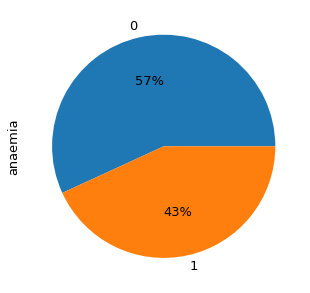

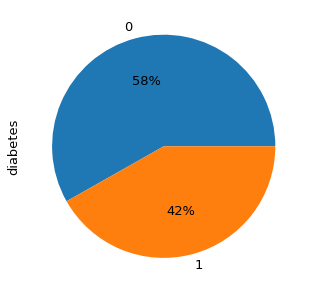

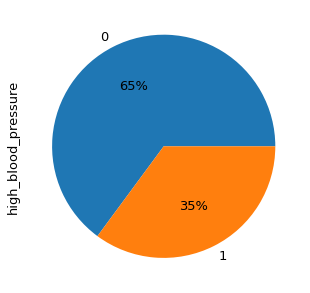

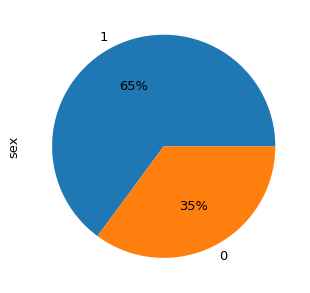

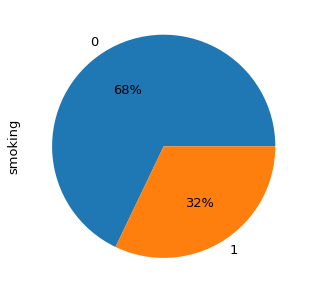

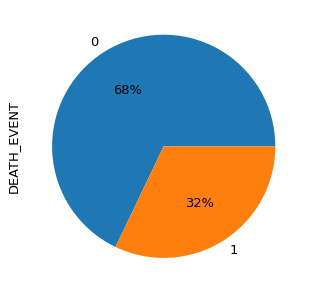

In [ ]:
pie_chart_distribution(df, binary_multiclass_cols)

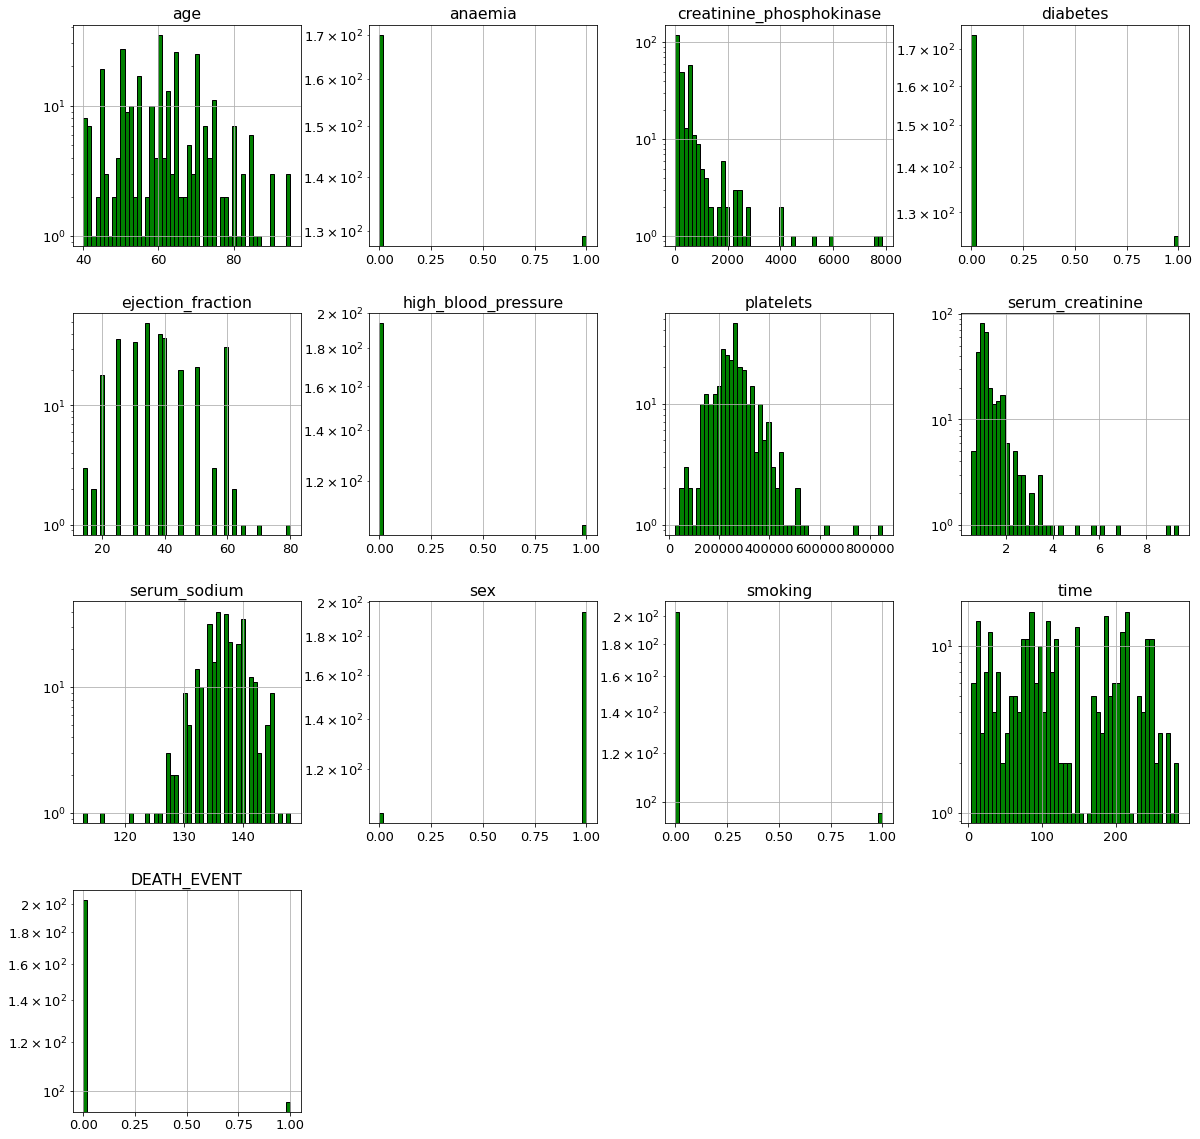

In [ ]:
# Overall idea about distribution of data histogram
df.select_dtypes(include=[int, float]).hist(bins=50, figsize=(20,20), log=True, color = "g", edgecolor='black')
plt.show()

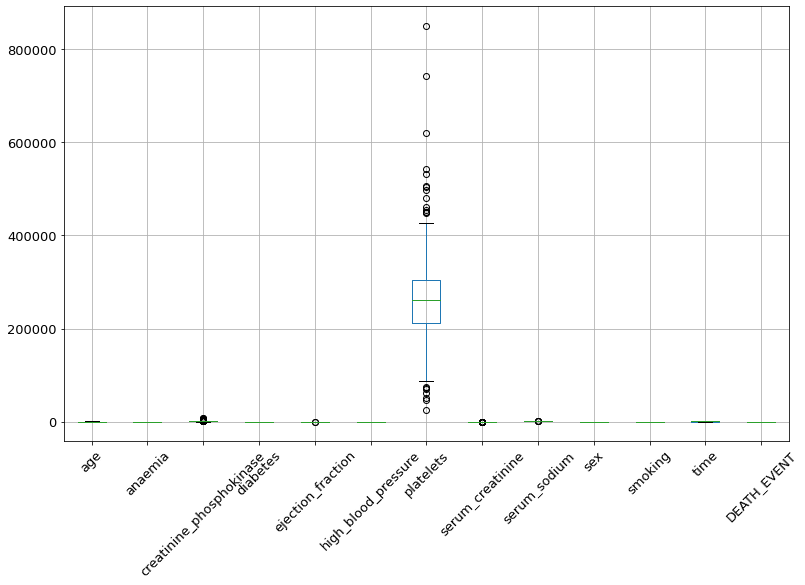

In [ ]:
# We apply Boxplot using boxplot() function on the numeric variables as shown below:
plt.figure(figsize=(13,8))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

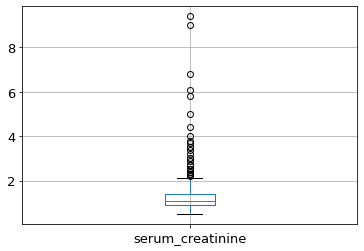

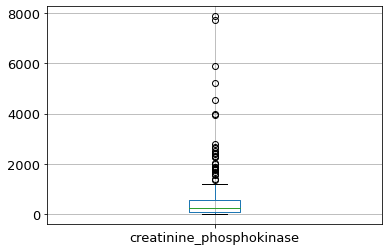

In [ ]:
df[['serum_creatinine']].boxplot()
plt.show()
df[['creatinine_phosphokinase']].boxplot()
plt.show()

In [ ]:
df_n = df.copy()
df_n1 = df.copy()

# lets try to remove the outliers
for x in df_n1.columns.tolist():
    q75,q25 = np.percentile(df_n1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_n.loc[df[x] < min,x] = np.nan
    df_n.loc[df[x] > max,x] = np.nan

# lets try to check the sum of count of NULL values/outliers in each column of the dataset
print(df_n.isnull().sum())

age                          0
anaemia                      0
creatinine_phosphokinase    29
diabetes                     0
ejection_fraction            2
high_blood_pressure          0
platelets                   21
serum_creatinine            29
serum_sodium                 4
sex                          0
smoking                      0
time                         0
DEATH_EVENT                  0
dtype: int64


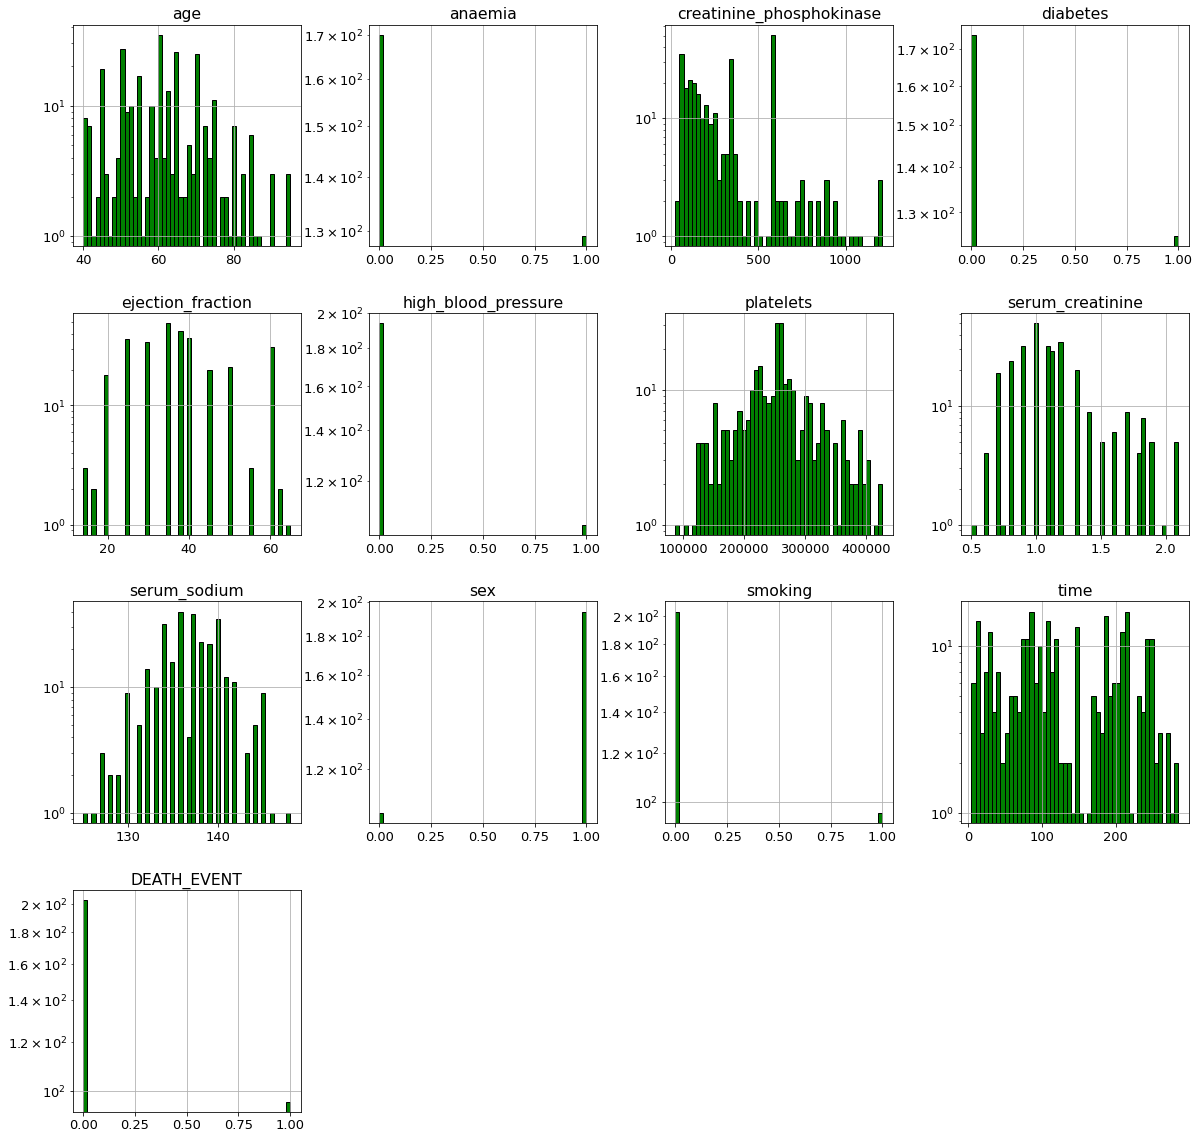

In [ ]:
# fill the outliers with mean
df = df_n.fillna(df_n.mean())
# Overall idea about distribution of data histogram after handle outliers
df.select_dtypes(include=[int, float]).hist(bins=50, figsize=(20,20), log=True, color = "g", edgecolor='black')
plt.show()

In [ ]:
df['age'].min(), df['age'].max()

(40.0, 95.0)

In [ ]:
bin_labels = ['younger_group','older_group']

df['age'] = pd.cut(df['age'], bins=[35,60,100], labels=bin_labels)
df['age'].value_counts()

younger_group    162
older_group      137
Name: age, dtype: int64

In [ ]:
df['platelets'].min()/100, df['platelets'].max()

(870.0, 427000.0)

In [ ]:
# The normal number of platelets in the blood is 150,000 to 400,000 platelets per microliter (mcL) or 150 to 400 × 109/L.
def plateletes(x):
    if x<150000: # low platelets
        return 'low'
    elif x >=150000 and x<=400000: # normal platelets
        return 'normal'
    else:
        return 'high' # high platelets

df['platelets'] = df['platelets'].apply(plateletes)

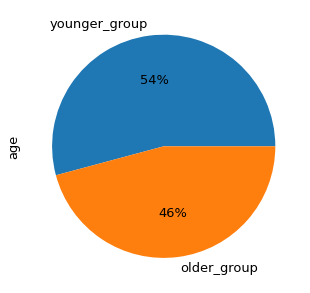

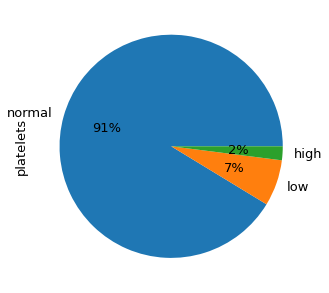

In [ ]:
pie_chart_distribution(df, ['age', 'platelets'])

In [ ]:
numeric_cols.remove('age'), binary_multiclass_cols.append('age')
numeric_cols.remove('platelets'), binary_multiclass_cols.append('platelets')

(None, None)

In [ ]:
numeric_cols, binary_multiclass_cols

(['creatinine_phosphokinase',
  'ejection_fraction',
  'serum_creatinine',
  'serum_sodium',
  'time'],
 ['anaemia',
  'diabetes',
  'high_blood_pressure',
  'sex',
  'smoking',
  'DEATH_EVENT',
  'age',
  'platelets'])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

data_pipeline = ColumnTransformer([
    ('numerical', num_pipeline, numeric_cols),
    ('categorical', OneHotEncoder(drop='if_binary'), binary_multiclass_cols),
    
])

df_processed = data_pipeline.fit_transform(df)

In [ ]:
cat_features_names = data_pipeline.named_transformers_['categorical'].get_feature_names_out(binary_multiclass_cols).tolist()
features = numeric_cols+cat_features_names

In [ ]:
df_processed = pd.DataFrame(df_processed,  columns=features)

In [ ]:
cols = numeric_cols+binary_multiclass_cols[:-1]+ ['platelets_high',
 'platelets_low',
 'platelets_normal']

df_processed.columns = cols
df_processed.head()

,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT,age,platelets_high,platelets_low,platelets_normal
0,0.948189,-1.562729,2.379744,-1.791777,-1.629502,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.014456,-0.112739,-0.227176,-1.603691,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,-0.707243,-1.562729,0.510382,-2.052544,-1.590785,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.840133,-1.562729,2.379744,0.033590,-1.590785,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,-0.654087,-1.562729,0.000000,0.000000,-1.577879,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier

#import for preprocessing
from sklearn.model_selection import train_test_split

# for balancing the data
from imblearn.over_sampling import RandomOverSampler


# import methods for measuring accuracy, precision, recall etc
from sklearn.metrics import (
    accuracy_score, 
    precision_score,
    recall_score,
    roc_auc_score,
    f1_score,
)

# **Random Forests Feature Selection**

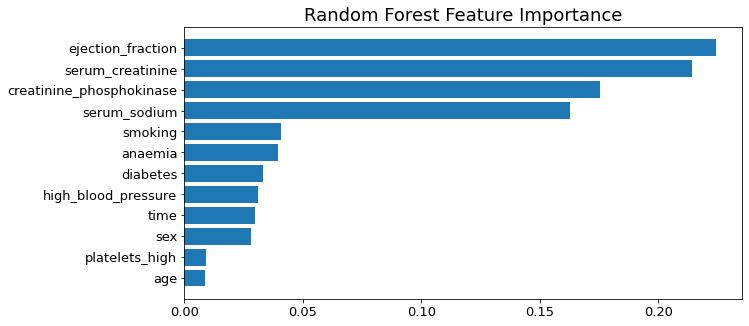

In [ ]:
# extracting dependent and independent variables
X = df_processed.drop(['DEATH_EVENT','time'], axis = 1)
y = df_processed['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# evaluating the model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# let’s sort the features, and plot graph
plt.figure(figsize=(10,5))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df_processed.columns[sorted_idx][1:], rf.feature_importances_[sorted_idx][1:])
plt.title("Random Forest Feature Importance", fontsize=18)
plt.show()

In [ ]:
def get_model_results(df,model_object, executations=100):
    print("processing", end="")
    acc= []
    prec = []
    rec = []
    f1 = []
    for i in range(executations):

        # shuffling the rows at each execution
        df = df.sample(frac=1)

        X = df.drop('DEATH_EVENT', axis = 1)
        Y = df['DEATH_EVENT']

        # RandomOverSampler apply for unbalanced data
        oversample = RandomOverSampler(sampling_strategy='minority')
        X_over, Y_over = oversample.fit_resample(X,Y) 

        # splitting dataset into 70% for training and 30% for testing
        X_train, X_test, y_train, y_test = train_test_split(X_over,Y_over, test_size = 0.3, random_state = 0, shuffle=False,stratify=None) 
        clf = model_object
        clf.fit(X_train,y_train)
        
        # performnance metrics
        accuracy = accuracy_score(clf.predict(X_test), y_test)
        precision = precision_score(clf.predict(X_test), y_test)
        recall = recall_score(clf.predict(X_test), y_test)
        f1_sc = f1_score(clf.predict(X_test), y_test)
        acc.append(accuracy)
        prec.append(precision)
        rec.append(recall)
        f1.append(f1_sc)
        print("."*1, end="")
    print("done")
    return [np.array(acc).mean(),np.array(prec).mean(),np.array(rec).mean(),np.array(f1).mean()]

In [ ]:
print("Random Forest Model")
rf = RandomForestClassifier()
rf_results = get_model_results(df_processed, rf, executations=100)

Random Forest Model
processing....................................................................................................done


In [ ]:
print("Extra Tree Classifier Model")
ext = ExtraTreesClassifier()
ext_results = get_model_results(df_processed, ext, executations=100)

Extra Tree Classifier Model
processing....................................................................................................done


In [ ]:
print("Light Gradient Boosting (LGBM) Classifier Model")
lgbm = LGBMClassifier()
lgbm_results = get_model_results(df_processed, lgbm, executations=100)

Light Gradient Boosting (LGBM) Classifier Model
processing....................................................................................................done


In [ ]:
print("Decision Tree Classifier Model")
dt = DecisionTreeClassifier()
dt_results = get_model_results(df_processed, dt, executations=100)

Decision Tree Classifier Model
processing....................................................................................................done


In [ ]:
print("SVM Classifier Model")
svm = SVC()
svm_results = get_model_results(df_processed, svm, executations=100)

SVM Classifier Model
processing....................................................................................................done


In [ ]:
print("Gaussian Navie Bayes Classifier Model")
gnb = GaussianNB()
gnb_results = get_model_results(df_processed, gnb, executations=100)

Gaussian Navie Bayes Classifier Model
processing....................................................................................................done


In [ ]:
print("Adaboost Classifier Model")
ada = AdaBoostClassifier()
ada_results = get_model_results(df_processed, ada, executations=100)

Adaboost Classifier Model
processing....................................................................................................done


In [ ]:
print("SGD Classifier Model")
sgd = SGDClassifier()
sgd_results = get_model_results(df_processed, sgd, executations=100)

SGD Classifier Model
processing....................................................................................................done


In [ ]:
print("Logistic Regression Classifier Model")
lr = LogisticRegression()
lr_results = get_model_results(df_processed, lr, executations=100)

Logistic Regression Classifier Model
processing....................................................................................................done


# Model Performance Evaluation

In [ ]:
# showing all models result
dic = {
    'Metrics':['Accuracy','Precision','Recall','F1-score'],
    'DT' : dt_results,    
    'AdaBoost' : ada_results,
    'LR' : lr_results, 
    'SGD' : sgd_results, 
    'RF' : rf_results, 
    'LGBM' : lgbm_results, 
    'ETC' : ext_results, 
    'GNB' : gnb_results, 
    'SVM' : svm_results, 
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df.T, headers = 'keys', tablefmt = 'psql'))

+----------+------------+-------------+----------+------------+
|          |   Accuracy |   Precision |   Recall |   F1-score |
|----------+------------+-------------+----------+------------|
| DT       |   0.965902 |    0.974964 | 0.987835 |   0.981204 |
| AdaBoost |   0.831721 |    0.825964 | 0.988617 |   0.899371 |
| LR       |   0.69     |    0.669885 | 0.987863 |   0.79735  |
| SGD      |   0.641967 |    0.624956 | 0.979683 |   0.746642 |
| RF       |   0.960738 |    0.963991 | 0.99336  |   0.978247 |
| LGBM     |   0.967951 |    0.972499 | 0.992687 |   0.982334 |
| ETC      |   0.95418  |    0.955365 | 0.994839 |   0.974451 |
| GNB      |   0.750984 |    0.739744 | 0.984502 |   0.843528 |
| SVM      |   0.789344 |    0.779515 | 0.989002 |   0.87106  |
+----------+------------+-------------+----------+------------+


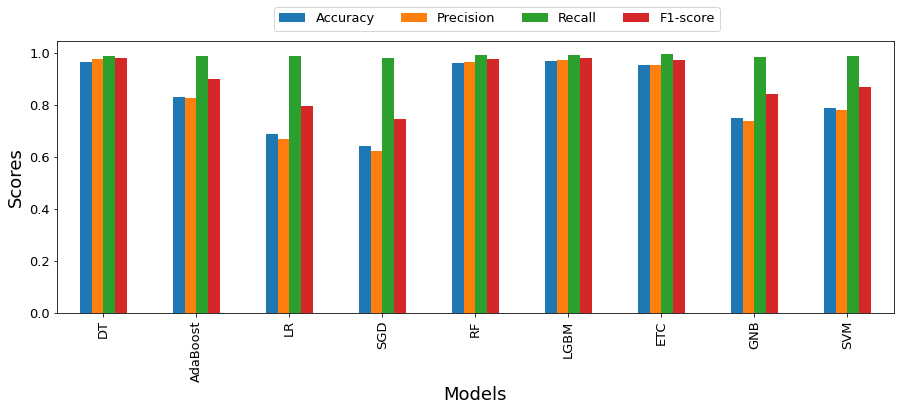

In [ ]:
metrics_df.T.plot(kind='bar', figsize=(15,5))
plt.ylabel('Scores',fontsize=18)
plt.xlabel('Models',fontsize=18)
plt.legend(ncol=4, bbox_to_anchor=(0.8,1.15))
plt.show()

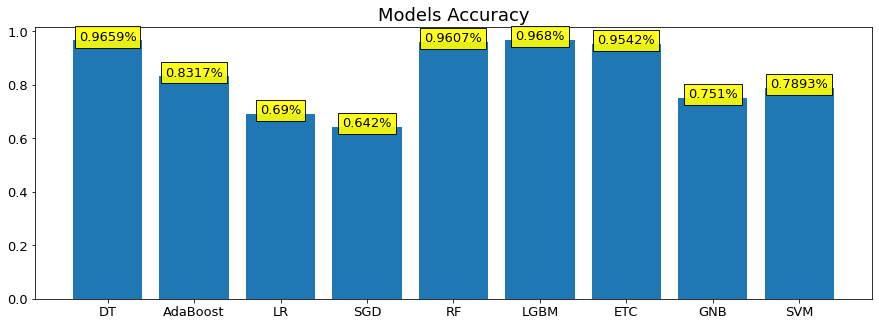

In [ ]:
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],4),f"{round(acc[i],4)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()